Taking a step further to do a constructive analysis (data preprocessing + data visualization + report writing)


Explore this data: https://www.kaggle.com/ahsen1330/us-police-shootings, and share a detailed report on your findings by writing it as a blog on Medium. 

In [64]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

In [65]:
url = "https://raw.githubusercontent.com/aisha-rm/Kadatemy/main/shootings.csv"
shootings = pd.read_csv(url)
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [66]:
shootings.shape

(4895, 15)

In [67]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [68]:
shootings.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [69]:
shootings.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,1792,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,2018-06-29,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,9,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
mean,2902.148519,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2847.000000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4352.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
shootings2 = shootings.copy()

In [71]:
shootings2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [72]:
date = shootings2.loc[:, "date"]
date

0       2015-01-02
1       2015-01-02
2       2015-01-03
3       2015-01-04
4       2015-01-04
           ...    
4890    2020-06-12
4891    2020-06-12
4892    2020-06-13
4893    2020-06-13
4894    2020-06-15
Name: date, Length: 4895, dtype: object

In [73]:
date = date.str.split('-', expand=True)
date

,0,1,2
0,2015,01,02
1,2015,01,02
2,2015,01,03
3,2015,01,04
4,2015,01,04
...,...,...,...
4890,2020,06,12
4891,2020,06,12
4892,2020,06,13
4893,2020,06,13


In [74]:
year = date.iloc[:, 0]
year

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
4890    2020
4891    2020
4892    2020
4893    2020
4894    2020
Name: 0, Length: 4895, dtype: object

In [75]:
shootings2["date"] = year

In [76]:
shootings2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [77]:
shootings2 = shootings2.rename(columns={"date":"year"})

In [78]:
shootings2.head()

,id,name,year,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [79]:
shootings2.shape

(4895, 15)

In [80]:
shootings2["year"] = pd.to_datetime(shootings2["year"])

In [81]:
shootings2.dtypes

id                                  int64
name                               object
year                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [82]:
shootings2.head(3)

,id,name,year,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-01,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-01,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-01,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed


In [83]:
shootings2.year.value_counts()

2015-01-01    965
2017-01-01    906
2016-01-01    904
2018-01-01    888
2019-01-01    858
2020-01-01    374
Name: year, dtype: int64

In [84]:
shootings2.drop(columns=["name"],inplace = True)

In [85]:
shootings2.head()

,id,year,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,2015-01-01,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,2015-01-01,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,2015-01-01,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,2015-01-01,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,2015-01-01,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [86]:
shootings2.to_csv("shootings2.csv",index = False)

In [87]:
pwd

'C:\\Users\\pinck'

In [88]:
df = pd.read_csv("Downloads/shootings2.csv")

In [89]:
df.head()

,id,year,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,2015-01-01,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,2015-01-01,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,2015-01-01,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,2015-01-01,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,2015-01-01,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [90]:
df.shape

(4895, 14)

In [91]:
df.tail(3000)

,id,year,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1895,2223,2017-01-01,shot and Tasered,unarmed,23.0,M,Black,Reagan,TN,False,attack,Not fleeing,False,Unarmed
1896,2209,2017-01-01,shot,air conditioner,41.0,M,White,Austin,MN,False,undetermined,Not fleeing,False,Other unusual objects
1897,2210,2017-01-01,shot,gun,41.0,M,Other,Lake Elsinore,CA,False,attack,Other,False,Guns
1898,2215,2017-01-01,shot,gun,38.0,M,Hispanic,Camden,NJ,False,attack,Not fleeing,False,Guns
1899,2211,2017-01-01,shot,gun,54.0,M,White,Ocala,FL,True,other,Not fleeing,False,Guns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,2020-01-01,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,2020-01-01,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,2020-01-01,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,2020-01-01,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [92]:
cleanData = df.iloc[1895:, :]

In [93]:
cleanData.shape

(3000, 14)

In [94]:
cleanData = cleanData.reindex(columns = ["id","age", "gender", "race","manner_of_death","armed", "arms_category", "year", "city","state","signs_of_mental_illnes",
                                                "threat_level","flee","body_camera"])

In [95]:
cleanData.head()

,id,age,gender,race,manner_of_death,armed,arms_category,year,city,state,signs_of_mental_illnes,threat_level,flee,body_camera
1895,2223,23.0,M,Black,shot and Tasered,unarmed,Unarmed,2017-01-01,Reagan,TN,NaN,attack,Not fleeing,False
1896,2209,41.0,M,White,shot,air conditioner,Other unusual objects,2017-01-01,Austin,MN,NaN,undetermined,Not fleeing,False
1897,2210,41.0,M,Other,shot,gun,Guns,2017-01-01,Lake Elsinore,CA,NaN,attack,Other,False
1898,2215,38.0,M,Hispanic,shot,gun,Guns,2017-01-01,Camden,NJ,NaN,attack,Not fleeing,False
1899,2211,54.0,M,White,shot,gun,Guns,2017-01-01,Ocala,FL,NaN,other,Not fleeing,False


**Data Visualization**



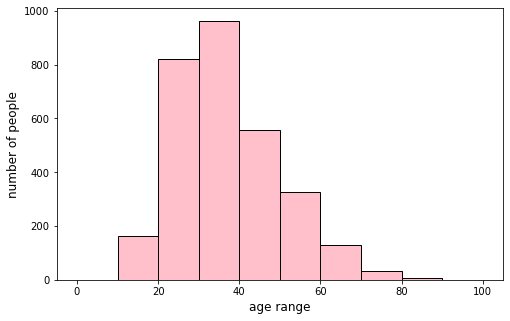

In [96]:
x = cleanData.age
# create histo
fig,ax = plt.subplots(figsize = (8, 5))
ax.hist(x, bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ec='black', facecolor = "pink")
plt.xlabel('age range', fontsize=12)
plt.ylabel('number of people', fontsize=12)
plt.show()

In [97]:
print(cleanData.age.mean())
print(cleanData.age.min())
print(cleanData.age.max())

36.74188850286298
6.0
91.0


From the above...............................

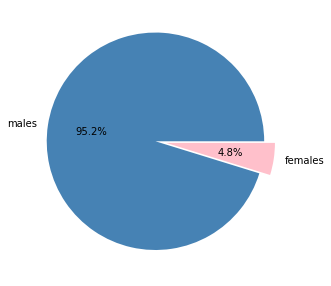

In [98]:
gender = ["males", "females"]
data = cleanData.gender.value_counts()
explode = (0.1, 0)
fig = plt.figure(figsize = (10,5))
color_list = ['steelblue', 'pink'] 
plt.pie(data, labels = gender, explode=explode, autopct='%1.1f%%', colors = color_list)
plt.show()

In [99]:
#The piechart above..................

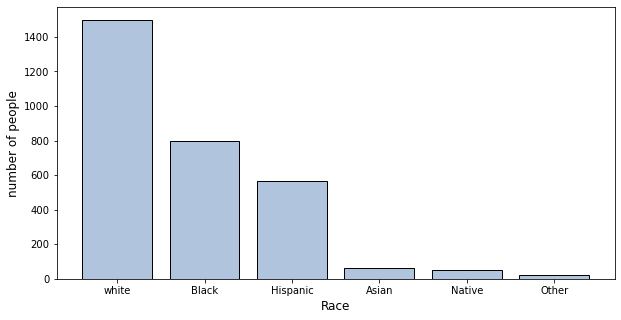

In [100]:
race = ["white", "Black", "Hispanic", "Asian", "Native", "Other"]
data = cleanData.race.value_counts()
fig = plt.figure(figsize = (10,5))
plt.xlabel('Race', fontsize=12)
plt.ylabel('number of people', fontsize=12)
plt.bar(race, data, facecolor = "lightsteelblue", ec= "black")
plt.show()

In [101]:
cleanData.race.value_counts()

White       1498
Black        798
Hispanic     565
Asian         64
Native        53
Other         22
Name: race, dtype: int64

Surprisingly, victims who were white were the highest, almost twice the number of black victims......................

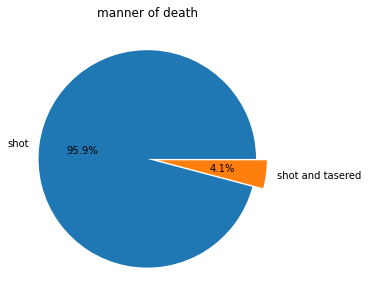

In [102]:
manner = ["shot", "shot and tasered"]
data = cleanData.manner_of_death.value_counts()
explode = (0, 0.1)
fig = plt.figure(figsize = (10,5))
plt.title("manner of death")
plt.pie(data, labels = manner, explode=explode, autopct='%1.1f%%')
plt.show()

In [103]:
#The ......................

In [104]:
cleanData.arms_category.value_counts()

Guns                     1721
Sharp objects             500
Unknown                   206
Unarmed                   201
Vehicles                  117
Other unusual objects      96
Blunt instruments          71
Multiple                   45
Piercing objects           20
Electrical devices         19
Explosives                  4
Name: arms_category, dtype: int64

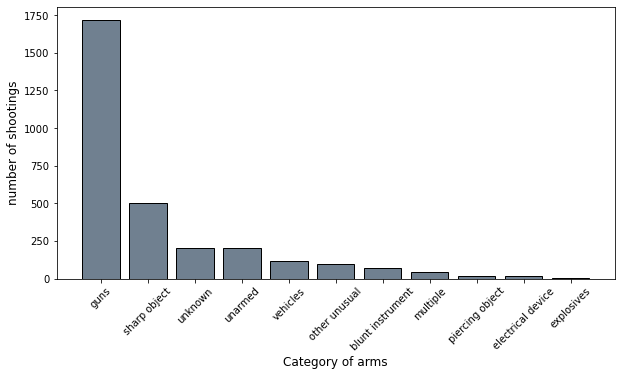

In [105]:
arms = ["guns", "sharp object", "unknown", "unarmed", "vehicles", "other unusual", "blunt instrument", "multiple", "piercing object", "electrical device", "explosives"]
data = cleanData.arms_category.value_counts()
fig = plt.figure(figsize = (10,5))
plt.xlabel('Category of arms', fontsize=12)
plt.ylabel('number of shootings', fontsize=12)
plt.xticks(rotation=45)
plt.bar(arms, data, color = "slategrey", ec= "black")
plt.show()

In [106]:
cleanData.year.value_counts()

2018-01-01    888
2017-01-01    880
2019-01-01    858
2020-01-01    374
Name: year, dtype: int64

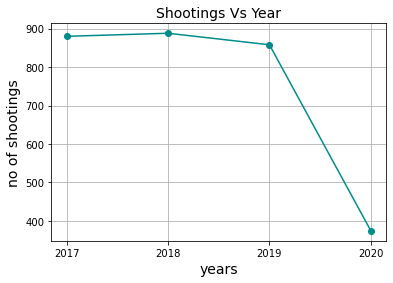

In [107]:
x = ["2017", "2018", "2019", "2020"]
y = [880, 888, 858, 374]
plt.plot(x, y, color='darkcyan', marker='o')
plt.title('Shootings Vs Year', fontsize=14)
plt.xlabel('years', fontsize=14)
plt.ylabel('no of shootings', fontsize=14)
plt.grid(True)
plt.show()

In [108]:
cleanData.state.mode()

0    CA
dtype: object

In [109]:
cleanData.city.mode()

0    Los Angeles
dtype: object

In [110]:
cleanData.state.value_counts()

CA    389
TX    247
FL    208
AZ    134
CO    112
GA    107
OK     98
NC     94
OH     91
WA     86
TN     84
MO     81
WI     60
IN     59
PA     58
LA     58
VA     57
AR     57
AL     55
NV     55
KY     53
NY     53
NM     52
IL     50
OR     48
MD     47
MS     45
SC     44
MI     43
UT     40
NJ     35
MN     34
KS     30
AK     26
WV     26
ID     24
IA     21
HI     21
MT     20
ME     17
CT     14
MA     12
NE      9
ND      9
NH      7
SD      7
DE      6
WY      6
VT      5
DC      4
RI      2
Name: state, dtype: int64

In [111]:
cleanData.threat_level.value_counts()

attack          1922
other            965
undetermined     113
Name: threat_level, dtype: int64

In [112]:
cleanData.flee.value_counts()

Not fleeing    1783
Car             536
Foot            412
Other           269
Name: flee, dtype: int64

In [113]:
cleanData.body_camera.value_counts()

False    2635
True      365
Name: body_camera, dtype: int64

In [114]:
year = cleanData.loc[:, "year"]
year = year.str.split('-', expand=True)
year = year.iloc[:, 0]
cleanData["year"] = year

In [115]:
cleanData.head()

,id,age,gender,race,manner_of_death,armed,arms_category,year,city,state,signs_of_mental_illnes,threat_level,flee,body_camera
1895,2223,23.0,M,Black,shot and Tasered,unarmed,Unarmed,2017,Reagan,TN,NaN,attack,Not fleeing,False
1896,2209,41.0,M,White,shot,air conditioner,Other unusual objects,2017,Austin,MN,NaN,undetermined,Not fleeing,False
1897,2210,41.0,M,Other,shot,gun,Guns,2017,Lake Elsinore,CA,NaN,attack,Other,False
1898,2215,38.0,M,Hispanic,shot,gun,Guns,2017,Camden,NJ,NaN,attack,Not fleeing,False
1899,2211,54.0,M,White,shot,gun,Guns,2017,Ocala,FL,NaN,other,Not fleeing,False


In [116]:
cleanData.year.value_counts()
cleanData['year'].value_counts()

2018    888
2017    880
2019    858
2020    374
Name: year, dtype: int64

In [117]:
data2017 = cleanData[cleanData.loc[:, "year"] == "2017"]
data2017.body_camera.value_counts()
data2017['body_camera'].value_counts(sort=True).tolist()

[783, 97]

In [118]:
data2018 = cleanData[cleanData.loc[:, "year"] == "2018"]
data2018.body_camera.value_counts()
data2018['body_camera'].value_counts(sort=True).tolist()

[779, 109]

In [119]:
data2019 = cleanData[cleanData.loc[:, "year"] == "2019"]
data2019.body_camera.value_counts()
data2019['body_camera'].value_counts(sort=True).tolist()

[737, 121]

In [120]:
data2020 = cleanData[cleanData.loc[:, "year"] == "2020"]
data2020.body_camera.value_counts()
data2020['body_camera'].value_counts()#(sort=True).tolist()

False    336
True      38
Name: body_camera, dtype: int64

<AxesSubplot:>

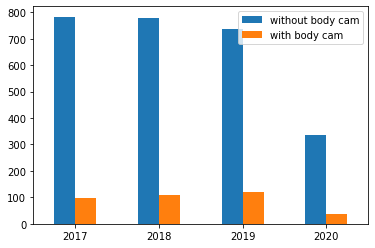

In [121]:
datalist = [[783, 97], [779, 109], [737,121], [336, 38]]
df = pd.DataFrame(datalist, columns = ["without body cam", "with body cam"])
df.index = ["2017", "2018", "2019", "2020"]
df.plot.bar(rot=0)


In [128]:
data2020.race.value_counts()

White       194
Black       103
Hispanic     63
Asian         8
Other         3
Native        3
Name: race, dtype: int64

In [125]:
pop2020 = 331449281  #US census - population in 2020



The population in the US is more than 317 million people (the population density - 29 people per 1 km2). According to the ethnic composition of the US population is represented by: white (63%); Hispanics (16.7%); African Americans (12.3%); Asians (4.8%); other nationalities (3.2%).
Source: http://aroundtravels.com/articles-about-usa/population-usa-population-population-in-united-states.html

In [132]:
#estimated population of each race in 2020
popW = 0.63 * pop2020  #whites
popW

208813047.03

In [133]:
popB = 0.123 * pop2020 #blacks
popB

40768261.563

In [134]:
popH = 0.167 * pop2020 #hispanics
popH

55352029.927

In [135]:
popA = 0.048 * pop2020
popA

15909565.488

In [136]:
popOthers = 0.032 * pop2020
popOthers

10606376.992

In [137]:
#2020 fatal deaths per 100,000 people per race
knum = 100000
fatalW = (194 / popW) * knum
fatalW

0.09290607208663938

In [139]:
fatalB = (103/popB) * knum
fatalB

0.25264751561906085

In [142]:
fatalH = (63/popH) *knum
fatalH

0.11381696404465451

In [143]:
fatalA = (8/popA) *knum
fatalA

0.05028421427369657

In [145]:
fatalOthers = ((3+3)/popOthers) * knum
fatalOthers

0.05656974105790864

In [ ]:
2.5 out of 100,000 Black people
 0.1 out of 100,000 people each.

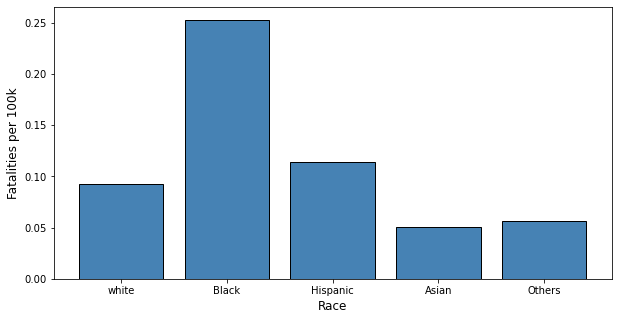

In [149]:
race1 = ["white", "Black", "Hispanic", "Asian", "Others"]
data1 = [fatalW, fatalB, fatalH, fatalA, fatalOthers]
fig = plt.figure(figsize = (10,5))
plt.xlabel('Race', fontsize=12)
plt.ylabel('Fatalities per 100k', fontsize=12)
plt.bar(race1, data1, facecolor = "steelblue", ec= "black")
plt.show()